In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
from warnings import filterwarnings
filterwarnings("ignore")

In [8]:
df = pd.read_csv(r"C:\Users\carol\OneDrive\Desktop\Sayaka\UNCW\BAN530\kaggle\Dataset14-Grocery-MarketBasket-Analysis.csv")

In [9]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [10]:
df.shape

(38765, 3)

In [11]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [12]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [13]:
df.duplicated().any()

True

In [14]:
df[df.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [15]:
df1 = df.drop_duplicates()
df1.shape

(38006, 3)

In [16]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.sort_values('Date')

,Member_number,Date,itemDescription
35406,3681,2014-01-01,dishes
12744,1789,2014-01-01,hamburger meat
13247,2610,2014-01-01,hamburger meat
26214,1249,2014-01-01,coffee
29730,4942,2014-01-01,frozen vegetables
...,...,...,...
17347,3971,2015-12-30,bottled beer
16428,2970,2015-12-30,meat
1134,4863,2015-12-30,dessert
34960,3562,2015-12-30,rolls/buns


In [17]:
df1.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [18]:
df1.Member_number.nunique()

3898

In [19]:
df1.itemDescription.nunique()

167

In [20]:
df1.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [21]:
df1["itemDescription"].value_counts().head(10)

itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

In [22]:
pd.crosstab(df1['Member_number'],df1['itemDescription'])

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
trans_df = pd.crosstab(df1['Member_number'],df1['itemDescription']).reset_index()
trans_df1 = trans_df.set_index('Member_number')
trans_df1

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
rw = trans_df1.shape[0]
col = trans_df1.shape[1]
print(rw)
print(col)

3898
167


In [35]:
item_list = df.itemDescription.unique()
item_list



array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [37]:
List_Item = []
for i in range(rw):
    temp = []
    for j in item_list:
        if trans_df.loc[i, j] >= 1:
            temp.append(j)
    List_Item.append(temp)

List_Item

[['whole milk',
  'yogurt',
  'sausage',
  'pastry',
  'canned beer',
  'misc. beverages',
  'soda',
  'pickled vegetables',
  'salty snack',
  'hygiene articles',
  'semi-finished bread'],
 ['whole milk',
  'rolls/buns',
  'beef',
  'frankfurter',
  'sausage',
  'soda',
  'curd',
  'whipped/sour cream',
  'white bread'],
 ['tropical fruit',
  'whole milk',
  'other vegetables',
  'butter',
  'butter milk',
  'sugar',
  'specialty chocolate',
  'frozen vegetables'],
 ['rolls/buns',
  'sausage',
  'root vegetables',
  'frozen meals',
  'detergent',
  'dental care'],
 ['tropical fruit',
  'whole milk',
  'pip fruit',
  'other vegetables',
  'rolls/buns',
  'packaged fruit/vegetables',
  'chocolate',
  'root vegetables',
  'pastry',
  'canned beer',
  'red/blush wine',
  'shopping bags',
  'dish cleaner',
  'cling film/bags',
  'frozen fish',
  'hygiene articles'],
 ['rolls/buns', 'margarine', 'whipped/sour cream'],
 ['whole milk',
  'rolls/buns',
  'frankfurter',
  'chicken',
  'chocolat

In [27]:
trans_df1['Item_List'] = List_Item
trans_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Item_List
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[canned beer, hygiene articles, misc. beverage..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[beef, curd, frankfurter, rolls/buns, sausage,..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[butter, butter milk, frozen vegetables, other..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[dental care, detergent, frozen meals, rolls/b..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[canned beer, chocolate, cling film/bags, dish..."


In [38]:
trans_df1['Item_List'] = List_Item
trans_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Item_List
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[tropical fruit, whole milk, other vegetables,..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[tropical fruit, whole milk, pip fruit, other ..."


In [39]:
basket_df = trans_df1[['Item_List']]
basket_df.head(10)

itemDescription,Item_List
Member_number,
1000,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,"[tropical fruit, whole milk, other vegetables,..."
1003,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,"[tropical fruit, whole milk, pip fruit, other ..."
1005,"[rolls/buns, margarine, whipped/sour cream]"
1006,"[whole milk, rolls/buns, frankfurter, chicken,..."
1008,"[tropical fruit, yogurt, hamburger meat, root ..."
1009,"[tropical fruit, yogurt, pastry, herbs, newspa..."


In [40]:
trans_df2= trans_df1.drop(['Item_List'],axis = 1)
trans_df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [41]:
def encode_units(x):
        if x > 1:
            return 1
        else: 
            return 0

basket_trans = trans_df2.applymap(encode_units)
basket_trans.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
whole_milk_df = basket_trans.loc[basket_trans['whole milk']==1]
whole_milk_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(whole_milk_df, min_support=0.015, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.017429,(beef)
1,0.023965,(bottled beer)
2,0.034858,(bottled water)
3,0.015251,(butter)
4,0.023965,(canned beer)
5,0.034858,(citrus fruit)
6,0.017429,(curd)
7,0.023965,(domestic eggs)
8,0.019608,(frankfurter)
9,0.015251,(fruit/vegetable juice)


In [46]:
#Sorting the association rules into rules
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold =1)

In [48]:
#Sorting the rules on lift and support
whole_milk_rules.sort_values(['lift','support'],ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
1,(yogurt),(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
2,"(other vegetables, whole milk)",(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
3,"(yogurt, whole milk)",(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
4,(other vegetables),"(yogurt, whole milk)",0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
5,(yogurt),"(other vegetables, whole milk)",0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
6,(other vegetables),(rolls/buns),0.135076,0.100218,0.021786,0.161290,1.609397,1.0,0.008249,1.072817,0.437783,0.102041,0.067875,0.189341
7,(rolls/buns),(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341
8,"(other vegetables, whole milk)",(rolls/buns),0.135076,0.100218,0.021786,0.161290,1.609397,1.0,0.008249,1.072817,0.437783,0.102041,0.067875,0.189341
9,"(rolls/buns, whole milk)",(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341


In [49]:
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.017429,1.000000,0.017429,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.017429,0.000000,0.508715
1,(whole milk),(beef),1.000000,0.017429,0.017429,0.017429,1.000000,1.0,0.000000,1.000000,0.000000,0.017429,0.000000,0.508715
2,(bottled beer),(whole milk),0.023965,1.000000,0.023965,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.023965,0.000000,0.511983
3,(whole milk),(bottled beer),1.000000,0.023965,0.023965,0.023965,1.000000,1.0,0.000000,1.000000,0.000000,0.023965,0.000000,0.511983
4,(bottled water),(whole milk),0.034858,1.000000,0.034858,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.034858,0.000000,0.517429
5,(whole milk),(bottled water),1.000000,0.034858,0.034858,0.034858,1.000000,1.0,0.000000,1.000000,0.000000,0.034858,0.000000,0.517429
6,(butter),(whole milk),0.015251,1.000000,0.015251,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.015251,0.000000,0.507625
7,(whole milk),(butter),1.000000,0.015251,0.015251,0.015251,1.000000,1.0,0.000000,1.000000,0.000000,0.015251,0.000000,0.507625
8,(canned beer),(whole milk),0.023965,1.000000,0.023965,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.023965,0.000000,0.511983
9,(whole milk),(canned beer),1.000000,0.023965,0.023965,0.023965,1.000000,1.0,0.000000,1.000000,0.000000,0.023965,0.000000,0.511983


In [52]:
#Sorting the rules on lift and support
whole_milk_rules.sort_values(['lift','support'],ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
1,(yogurt),(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
2,"(other vegetables, whole milk)",(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
3,"(yogurt, whole milk)",(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
4,(other vegetables),"(yogurt, whole milk)",0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
5,(yogurt),"(other vegetables, whole milk)",0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
6,(other vegetables),(rolls/buns),0.135076,0.100218,0.021786,0.161290,1.609397,1.0,0.008249,1.072817,0.437783,0.102041,0.067875,0.189341
7,(rolls/buns),(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341
8,"(other vegetables, whole milk)",(rolls/buns),0.135076,0.100218,0.021786,0.161290,1.609397,1.0,0.008249,1.072817,0.437783,0.102041,0.067875,0.189341
9,"(rolls/buns, whole milk)",(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341


In [56]:
from mlxtend.frequent_patterns import apriori, association_rules

def frequently_bought_together(item):
    # Filter the dataframe for the item passed
    item_df = basket_trans.loc[basket_trans[item] == 1]
    
    # Apply apriori algorithm on the filtered dataframe
    frequent_itemsets = apriori(item_df, min_support=0.015, use_colnames=True)
    
    # Generate strong association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sort the rules by lift and support
    rules_sorted = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Return top 6 items with highest lift and support
    return rules_sorted['consequents'].unique()[:6]


In [57]:
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'frankfurter'}), frozenset({'other vegetables'}),
       frozenset({'ham'}), frozenset({'tropical fruit'}),
       frozenset({'salty snack', 'frankfurter'}),
       frozenset({'other vegetables', 'salty snack'})], dtype=object)

In [58]:
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'chocolate'}), frozenset({'beef'}),
       frozenset({'other vegetables'}), frozenset({'rolls/buns'}),
       frozenset({'candy'}), frozenset({'coffee'})], dtype=object)

In [60]:
frequently_bought_together('domestic eggs')

Items frequently bought together with domestic eggs


array([frozenset({'whipped/sour cream'}), frozenset({'beef'}),
       frozenset({'whipped/sour cream', 'domestic eggs'}),
       frozenset({'beef', 'domestic eggs'}),
       frozenset({'whipped/sour cream', 'whole milk'}),
       frozenset({'beef', 'whole milk'})], dtype=object)

In [62]:
df[df['Member_number'] == 2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


#### Top10 Association Rules for Specific Items: Whole Milk

In [63]:
cat_df = basket_trans.loc[basket_trans['whole milk'] == 1]
frequent_itemsets = apriori(cat_df, min_support = 0.015, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
top_rules = rules.sort_values(by = 'lift', ascending = False).head(10)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
26,(other vegetables),(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
58,(yogurt),"(other vegetables, whole milk)",0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
57,(other vegetables),"(yogurt, whole milk)",0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
56,"(yogurt, whole milk)",(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
55,"(other vegetables, whole milk)",(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944
27,(yogurt),(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944
50,"(rolls/buns, whole milk)",(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341
22,(other vegetables),(rolls/buns),0.135076,0.100218,0.021786,0.161290,1.609397,1.0,0.008249,1.072817,0.437783,0.102041,0.067875,0.189341
53,(rolls/buns),"(other vegetables, whole milk)",0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341
23,(rolls/buns),(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341


In [64]:
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x:','.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x:','.join(list(x)))
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
26,(other vegetables),(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944,other vegetables,yogurt
58,(yogurt),"(other vegetables, whole milk)",0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944,yogurt,"other vegetables,whole milk"
57,(other vegetables),"(yogurt, whole milk)",0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944,other vegetables,"yogurt,whole milk"
56,"(yogurt, whole milk)",(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944,"yogurt,whole milk",other vegetables
55,"(other vegetables, whole milk)",(yogurt),0.135076,0.071895,0.019608,0.145161,2.019062,1.0,0.009896,1.085707,0.583543,0.104651,0.078941,0.208944,"other vegetables,whole milk",yogurt
27,(yogurt),(other vegetables),0.071895,0.135076,0.019608,0.272727,2.019062,1.0,0.009896,1.189270,0.543818,0.104651,0.159148,0.208944,yogurt,other vegetables
50,"(rolls/buns, whole milk)",(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341,"rolls/buns,whole milk",other vegetables
22,(other vegetables),(rolls/buns),0.135076,0.100218,0.021786,0.161290,1.609397,1.0,0.008249,1.072817,0.437783,0.102041,0.067875,0.189341,other vegetables,rolls/buns
53,(rolls/buns),"(other vegetables, whole milk)",0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341,rolls/buns,"other vegetables,whole milk"
23,(rolls/buns),(other vegetables),0.100218,0.135076,0.021786,0.217391,1.609397,1.0,0.008249,1.105180,0.420823,0.102041,0.095170,0.189341,rolls/buns,other vegetables


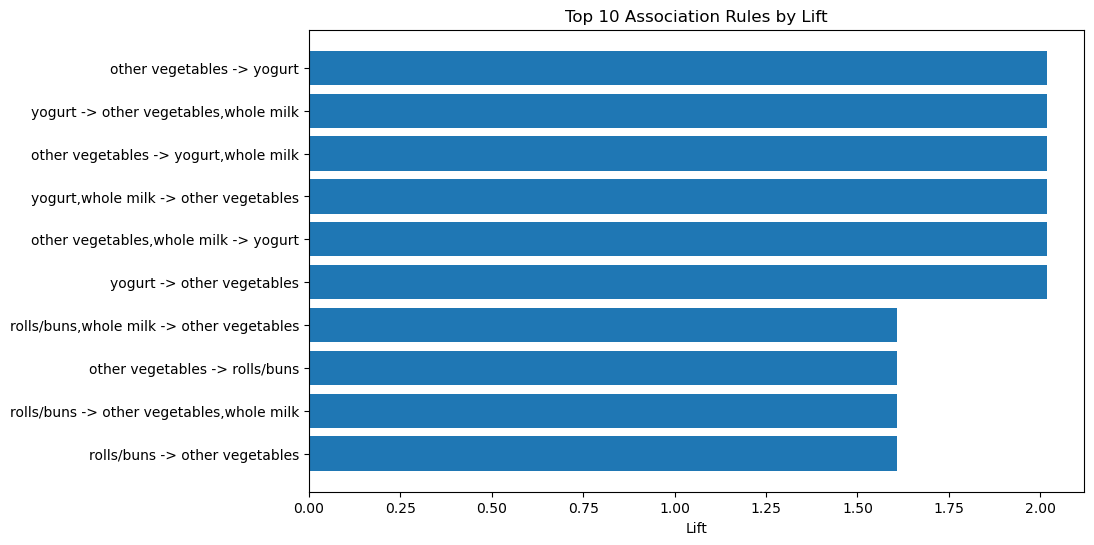

In [69]:
cat_df = basket_trans.loc[basket_trans['whole milk'] == 1]
frequent_itemsets = apriori(cat_df, min_support=0.015, use_colnames = True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 1)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

#Convert frozensets to string for labeling
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x:','.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x:','.join(list(x)))

# Create a new column with formatted rule labels
top_rules['rule_str'] = top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str']

#Create a bar chart
plt.figure(figsize=(10,6))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['rule_str'])
#plt.barh(range(len(top_rules)), top_rules['lift'], tick_label = top_rules['antecedents_str']) + ' -> ' + top_rules['consequents_str']
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()